In [2]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
from plotly import graph_objects as go

#### Importing data

In [2]:
msn_users = pd.read_csv("Data/users.csv")

In [3]:
msn_users.head()

user_id           created_at  company_id language         activated_at  \
0      0.0  2013-01-01 20:59:39      5737.0  english  2013-01-01 21:01:07   
1      1.0  2013-01-01 13:07:46        28.0  english                  NaN   
2      2.0  2013-01-01 10:59:05        51.0  english                  NaN   
3      3.0  2013-01-01 18:40:36      2800.0   german  2013-01-01 18:42:02   
4      4.0  2013-01-01 14:37:51      5110.0   indian  2013-01-01 14:39:05   

     state  
0   active  
1  pending  
2  pending  
3   active  
4   active

In [4]:
msn_events = pd.read_csv("Data/events.csv")

In [5]:
msn_events.head()

user_id          occurred_at  event_type    event_name location  \
0  10522.0  2014-05-02 11:02:39  engagement         login    Japan   
1  10522.0  2014-05-02 11:02:53  engagement     home_page    Japan   
2  10522.0  2014-05-02 11:03:28  engagement  like_message    Japan   
3  10522.0  2014-05-02 11:04:09  engagement    view_inbox    Japan   
4  10522.0  2014-05-02 11:03:16  engagement    search_run    Japan   

                   device  user_type  
0  dell inspiron notebook        3.0  
1  dell inspiron notebook        3.0  
2  dell inspiron notebook        3.0  
3  dell inspiron notebook        3.0  
4  dell inspiron notebook        3.0

In [12]:
msn_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340832 entries, 0 to 340831
Data columns (total 7 columns):
user_id        340832 non-null float64
occurred_at    340832 non-null object
event_type     340832 non-null object
event_name     340832 non-null object
location       340832 non-null object
device         340832 non-null object
user_type      325255 non-null float64
dtypes: float64(2), object(5)
memory usage: 18.2+ MB


In [6]:
msn_emails = pd.read_csv("Data/emails.csv")

In [7]:
msn_emails.head()

user_id          occurred_at              action  user_type
0      0.0  2014-05-06 09:30:00  sent_weekly_digest        1.0
1      0.0  2014-05-13 09:30:00  sent_weekly_digest        1.0
2      0.0  2014-05-20 09:30:00  sent_weekly_digest        1.0
3      0.0  2014-05-27 09:30:00  sent_weekly_digest        1.0
4      0.0  2014-06-03 09:30:00  sent_weekly_digest        1.0

MySQL local connection

In [ ]:
driver = "mysql+pymysql:"
user = "root"
password = "ironhack"
ip = "127.0.0.1"
database = "internal_messenger"

In [ ]:
connection_string = f"{driver}//{user}:{password}@{ip}/{database}"
engine = create_engine(connection_string)

POSTGRESQL local connection

In [3]:
driver = "postgresql:"
user = "postgres"
password = "ironhack"
ip = "localhost:5432"
database = "internal_messenger"

In [4]:
postgresql_connection_string = f"{driver}//{user}:{password}@{ip}/{database}"
engine = create_engine(postgresql_connection_string)

/home/salva/anaconda3/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning:

The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.



#### Uploading data to the POSTGRESQL DB

In [ ]:
msn_users.to_sql("users", con=engine, if_exists="append", index=False)

In [ ]:
msn_events.to_sql("events", con=engine, if_exists="append", index=False)

In [ ]:
msn_emails.to_sql("emails", con=engine, if_exists="append", index=False)

## Queries. Finding reasons behind the user engagement drop

#### Fetching all data from the db

In [11]:
query_users_pg = """
SELECT *
FROM users;
"""

In [12]:
users = pd.read_sql(query_users_pg, engine)

In [13]:
users.head()

user_id           created_at  company_id language         activated_at  \
0      0.0  2013-01-01 20:59:39      5737.0  english  2013-01-01 21:01:07   
1      1.0  2013-01-01 13:07:46        28.0  english                 None   
2      2.0  2013-01-01 10:59:05        51.0  english                 None   
3      3.0  2013-01-01 18:40:36      2800.0   german  2013-01-01 18:42:02   
4      4.0  2013-01-01 14:37:51      5110.0   indian  2013-01-01 14:39:05   

     state  
0   active  
1  pending  
2  pending  
3   active  
4   active

In [14]:
query_events_pg = """
SELECT *
FROM events;
"""

In [15]:
events = pd.read_sql(query_events_pg, engine)

In [16]:
events.head()

user_id          occurred_at  event_type    event_name location  \
0  10522.0  2014-05-02 11:02:39  engagement         login    Japan   
1  10522.0  2014-05-02 11:02:53  engagement     home_page    Japan   
2  10522.0  2014-05-02 11:03:28  engagement  like_message    Japan   
3  10522.0  2014-05-02 11:04:09  engagement    view_inbox    Japan   
4  10522.0  2014-05-02 11:03:16  engagement    search_run    Japan   

                   device  user_type  
0  dell inspiron notebook        3.0  
1  dell inspiron notebook        3.0  
2  dell inspiron notebook        3.0  
3  dell inspiron notebook        3.0  
4  dell inspiron notebook        3.0

In [17]:
query_emails_pg = """
SELECT *
FROM emails;
"""

In [18]:
emails = pd.read_sql(query_emails_pg, engine)

In [19]:
emails.head()

user_id          occurred_at              action  user_type
0      0.0  2014-05-06 09:30:00  sent_weekly_digest        1.0
1      0.0  2014-05-13 09:30:00  sent_weekly_digest        1.0
2      0.0  2014-05-20 09:30:00  sent_weekly_digest        1.0
3      0.0  2014-05-27 09:30:00  sent_weekly_digest        1.0
4      0.0  2014-06-03 09:30:00  sent_weekly_digest        1.0

## The issue. A drop in user engagement

In [82]:
query_issue = """
SELECT SUBSTR(((DATE_TRUNC('week', occurred_at::date)))::text, 6, 5) AS week,
 COUNT(DISTINCT user_id) AS weekly_active_users
FROM events
WHERE event_name = 'login'
GROUP BY week
ORDER BY week;
"""
user_engagement = pd.read_sql(query_issue, engine)

In [83]:
user_engagement

week  weekly_active_users
0   04-28                  701
1   05-05                 1054
2   05-12                 1094
3   05-19                 1147
4   05-26                 1113
5   06-02                 1173
6   06-09                 1219
7   06-16                 1262
8   06-23                 1249
9   06-30                 1271
10  07-07                 1355
11  07-14                 1345
12  07-21                 1363
13  07-28                 1442
14  08-04                 1266
15  08-11                 1215
16  08-18                 1203
17  08-25                 1194

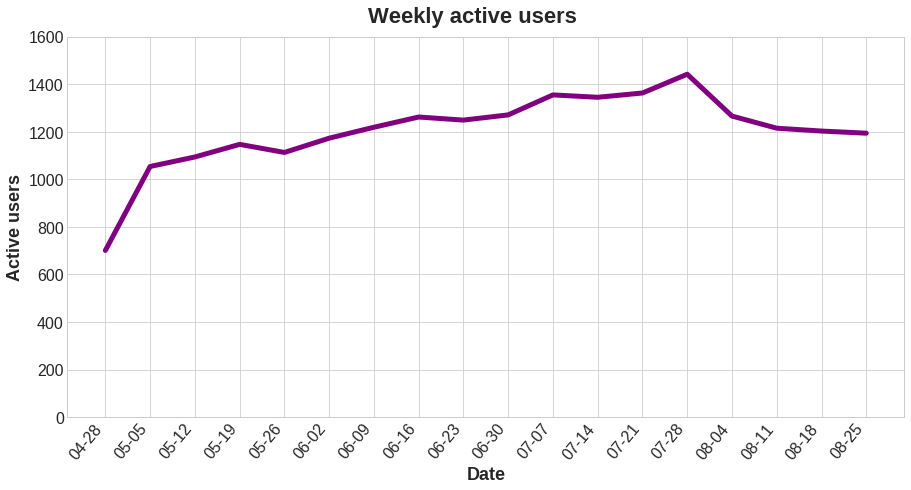

In [300]:
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(15,7))
    fig.suptitle("Weekly active users", fontsize=22, fontweight=650, y=0.94)
    
    sns.lineplot(user_engagement["week"], user_engagement["weekly_active_users"], lw=5, color="purple")
    ax.set_ylim(0, 1600)
    ax.tick_params(axis="x", labelsize=16, rotation=50)
    ax.tick_params(axis="y", labelsize=16)
    ax.set_xlabel("Date", fontsize=18, fontweight=650)
    ax.set_ylabel("Active users", fontsize=18, fontweight=650)

    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')

    plt.show()

## Holidays

Do I keep this one below??

In [24]:
query_holidays = """
SELECT location, DATE_TRUNC('week', occurred_at::date) AS week, COUNT(DISTINCT user_id)
FROM events
WHERE event_name = 'login'
GROUP BY location, week
ORDER BY location, week;
"""

holidays_0 = pd.read_sql(query_holidays, engine)

In [25]:
holidays_0.head()

location                      week  count
0  Argentina 2014-04-27 22:00:00+00:00      1
1  Argentina 2014-05-04 22:00:00+00:00      5
2  Argentina 2014-05-11 22:00:00+00:00      6
3  Argentina 2014-05-18 22:00:00+00:00      7
4  Argentina 2014-05-25 22:00:00+00:00      5

*This query below tries to find the countries where the number of active users in august was greater than in july. In order to consider holidays as the reason for the user engagement drop we would like to see in the query output a list of countries where august is not the main vacation month, which we would expect either from countries whose tradition makes that the predominant vacation month is none in particular, or just another one because of for example, being located in the south hemisphere.*

In [39]:
query_holidays= """
SELECT sub3.location
FROM(
    SELECT sub2.*
    FROM(
        SELECT sub1.*, LAG(sub1.active_users, 1) OVER (PARTITION BY sub1.location) AS active_users_t0
        FROM(
            SELECT location, EXTRACT('month' FROM occurred_at::date) AS month,
             COUNT(DISTINCT user_id) as active_users
            FROM events
            WHERE event_name = 'login'
            GROUP BY location, month
            ) sub1
        ) sub2
    WHERE sub2.month = 8
    ) sub3
WHERE sub3.active_users - sub3.active_users_t0 > 0;
"""

holidays_1 = pd.read_sql(query_holidays, engine)

In [40]:
holidays_1

location
0       Colombia
1        Denmark
2          Egypt
3         Greece
4      Indonesia
5           Iraq
6        Ireland
7       Malaysia
8       Pakistan
9    Philippines
10        Poland
11      Portugal
12     Singapore
13  South Africa
14         Spain
15        Turkey

I am Spanish and I can confirm august is traditionally the predominant vacation month. Well, here below is how the engagement user looks like by month in Spain

In [18]:
query_holidays= """
SELECT LEFT((DATE_TRUNC('month', occurred_at::date))::text, 7) AS month,
 COUNT(DISTINCT user_id) AS monthly_active_users
FROM events
WHERE event_name = 'login' AND location = 'Spain'
GROUP BY month;
"""
holidays_2 = pd.read_sql(query_holidays, engine)

In [281]:
holidays_2["month"] = holidays_2["month"].apply(lambda x: int(x))

ValueError: invalid literal for int() with base 10: '2014-06'

In [19]:
holidays_2.head()

month  monthly_active_users
0  2014-05                    45
1  2014-06                    49
2  2014-07                    45
3  2014-08                    52

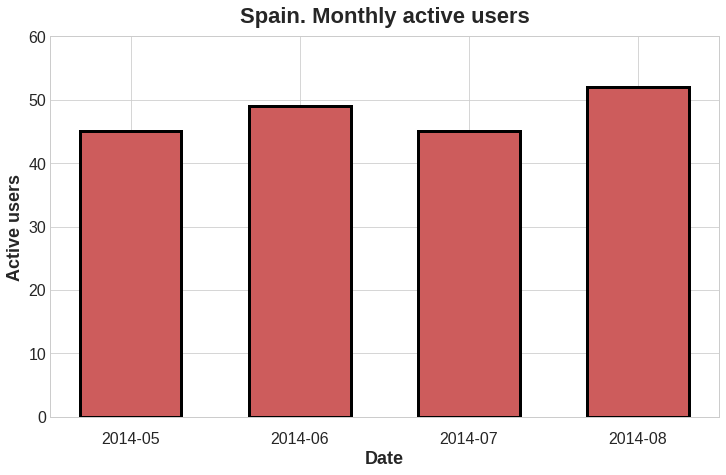

In [251]:
with plt.style.context('seaborn-whitegrid'):
    
    plt.figure(figsize=(12,7))
    plt.title("Spain. Monthly active users", fontsize=22, fontweight=650, y=1.02)
    
    plt.bar(holidays_2["month"], holidays_2["monthly_active_users"], color="indianred", width=0.6,
            edgecolor="black", linewidth=3)
    plt.ylim(0, holidays_2.monthly_active_users.max()+8)
    plt.tick_params(axis="x", labelsize=16, pad=15)
    plt.tick_params(axis="y", labelsize=16)
    plt.xlabel("Date", fontsize=18, fontweight=650)
    plt.ylabel("Active users", fontsize=18, fontweight=650)

    plt.show()

This in particular somewhat discourages me to think that holidays is the reason for the user engagement drop. [Develop]

### Broken feature

#### Device type

In [50]:
query_model_device = """
SELECT DISTINCT device
FROM events;
"""
device_0 = pd.read_sql(query_model_device, engine)

Below are listed all the model devices that have been used to log into the intranet

In [51]:
device_0

device
0    samsumg galaxy tablet
1          asus chromebook
2      samsung galaxy note
3                iphone 5s
4                 nexus 10
5          nokia lumia 635
6              macbook air
7                 iphone 5
8    dell inspiron desktop
9                  htc one
10         lenovo thinkpad
11               ipad mini
12             macbook pro
13                ipad air
14               iphone 4s
15                 nexus 7
16       amazon fire phone
17     hp pavilion desktop
18       samsung galaxy s4
19             kindle fire
20         windows surface
21     acer aspire desktop
22    acer aspire notebook
23                 nexus 5
24                mac mini
25  dell inspiron notebook

In [161]:
query_model_device = """
SELECT sub1.device_type AS device_type,
 SUBSTR(((DATE_TRUNC('week', occurred_at::date)))::text, 6, 5) AS week,
 COUNT(DISTINCT user_id) as active_users
FROM(
    SELECT *,
    CASE WHEN device IN ('nexus 10', 'windows surface', 'nexus 7', 'kindle fire') 
          OR device LIKE '%%pad%%' OR device ILIKE '%%tablet%%' THEN 'tablet'
         WHEN device IN ('nexus 5', 'samsung galaxy note', 'samsung galaxy s4', 'htc one', 'nokia 635')
          OR device LIKE '%%phone%%' THEN 'phone'
         ELSE 'laptop/PC' END AS device_type
    FROM events
    ) sub1
WHERE event_name = 'login'
GROUP BY device_type, week
ORDER BY week, device_type; 
"""

device_1 = pd.read_sql(query_model_device, engine)

In [162]:
device_1.head(10)

device_type   week  active_users
0   laptop/PC  04-28           358
1       phone  04-28           262
2      tablet  04-28           198
3   laptop/PC  05-05           619
4       phone  05-05           427
5      tablet  05-05           332
6   laptop/PC  05-12           600
7       phone  05-12           459
8      tablet  05-12           350
9   laptop/PC  05-19           629

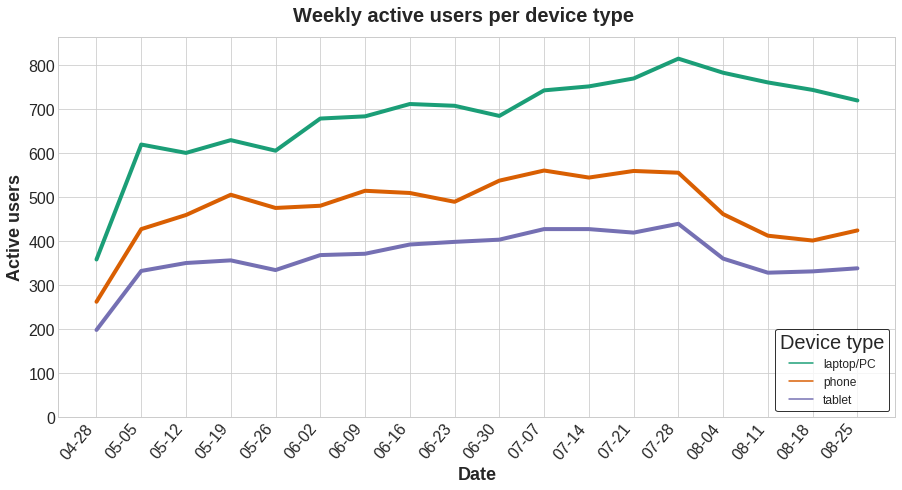

In [257]:
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(15,7))
    fig.suptitle("Weekly active users per device type", fontsize=20, fontweight=550, y=0.94)  
    
    ax=sns.lineplot(x="week", y="active_users", data=device_1, hue="device_type", palette="Dark2", lw=4) 
    ax.set_ylim(0, device_1.active_users.max()+50)
    ax.tick_params(axis="x", labelsize=16, rotation=50)
    ax.tick_params(axis="y", labelsize=16)
    ax.set_xlabel("Date", fontsize=18, fontweight=650)
    ax.set_ylabel("Active users", fontsize=18, fontweight=650)

    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(loc="lower right", handles=handles[1:], labels=labels[1:], prop={'size': 12}, frameon="yes",
              edgecolor="black", title="Device type", title_fontsize=20)

    plt.show()

In [153]:
query_model_device = """
SELECT device_type, active_users_t0, active_users, (active_users-active_users_t0) AS variation_drop,
 ROUND(CAST(((active_users::float-active_users_t0::float) / active_users_t0)*100 as numeric) ,2) AS variation_pct
FROM(
    SELECT sub3.*
    FROM(
        SELECT sub2.*, LAG(sub2.active_users, 1) OVER (PARTITION BY sub2.device_type) AS active_users_t0
        FROM(
            SELECT sub1.device_type AS device_type, EXTRACT('month' FROM occurred_at::date) AS month,
             COUNT(DISTINCT user_id) as active_users
            FROM(
                SELECT *,
                CASE WHEN device IN ('nexus 10', 'windows surface', 'nexus 7', 'kindle fire') 
                      OR device LIKE '%%pad%%' OR device ILIKE '%%tablet%%' THEN 'tablet'
                     WHEN device IN ('nexus 5', 'samsung galaxy note', 'samsung galaxy s4', 'htc one', 'nokia 635')
                      OR device LIKE '%%phone%%' THEN 'phone'
                     ELSE 'laptop/PC' END AS device_type
                FROM events
                ) sub1
            WHERE event_name = 'login'
            GROUP BY device_type, month
            ) sub2
        ) sub3
    WHERE sub3.month = 8
    ) sub4;  
"""

device_2 = pd.read_sql(query_model_device, engine)

In [154]:
device_2.style.format({"variation_pct":"{:.2f}%"})

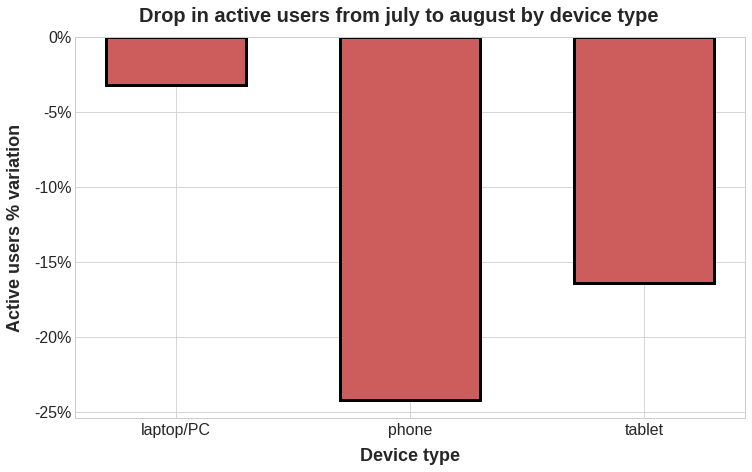

In [263]:
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(12,7))
    fig.suptitle("Drop in active users from july to august by device type", fontsize=20, fontweight=650, y=0.94)
    
    ax.bar(device_2["device_type"], device_2["variation_pct"], color="indianred", width=0.6,
            edgecolor="black", linewidth=3)
    ax.tick_params(axis="x", labelsize=16, pad=5)
    ax.tick_params(axis="y", labelsize=16)
    ax.set_xlabel("Device type", fontsize=18, fontweight=650, labelpad=10)
    ax.set_ylabel("Active users % variation", fontsize=18, fontweight=650, labelpad=10)
    
    ylabels = ['{:,.0f}%'.format(x) for x in ax.get_yticks()]
    ax.set_yticklabels(ylabels)

    plt.show()

### Operative system

In [220]:
query_operative_system = """
SELECT sub1.device_os AS device_os,
 SUBSTR(((DATE_TRUNC('week', occurred_at::date)))::text, 6, 5) AS week,
 COUNT(DISTINCT user_id) as active_users
FROM(
    SELECT *,
    CASE WHEN device LIKE 'i%%' OR device ILIKE '%%mac%%' THEN 'apple'
     WHEN device LIKE '%%nexus%%' OR device LIKE '%%galaxy%%' OR device LIKE '%%nokia%%'
      OR device LIKE '%%HTC%%' THEN 'android'
     WHEN device LIKE '%%fire%%' THEN 'fire os'
     ELSE 'windows' END AS device_os
    FROM events
    ) sub1
WHERE event_name = 'login'
GROUP BY device_os, week
ORDER BY week, device_os; 
"""

operative_system_1 = pd.read_sql(query_operative_system, engine)

In [223]:
operative_system_1.head(10)

device_os   week  active_users
0   android  04-28           164
1     apple  04-28           376
2   fire os  04-28            10
3   windows  04-28           246
4   android  05-05           253
5     apple  05-05           601
6   fire os  05-05            35
7   windows  05-05           426
8   android  05-12           270
9     apple  05-12           638

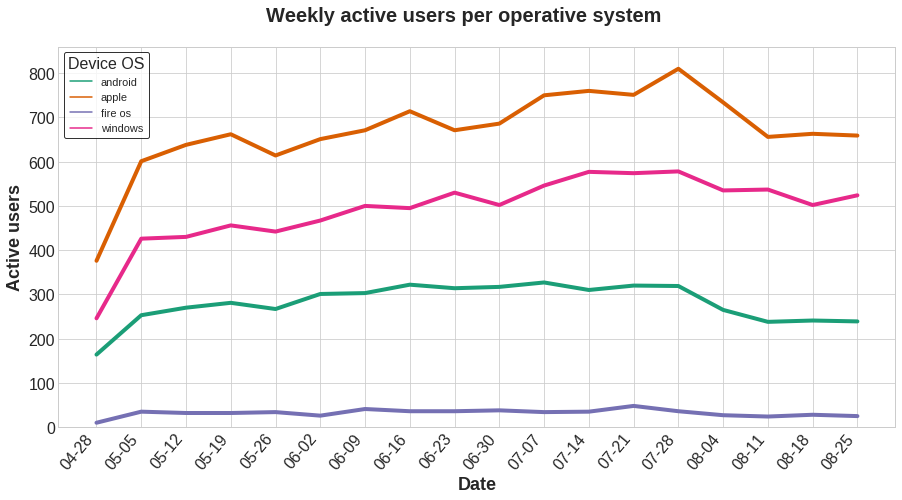

In [265]:
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(15,7))
    fig.suptitle("Weekly active users per operative system", fontsize=20, fontweight=650, y=0.96)  
    
    ax=sns.lineplot(x="week", y="active_users", data=operative_system_1, hue="device_os", palette="Dark2", lw=4) 
    ax.set_ylim(0, operative_system_1.active_users.max()+50)
    ax.tick_params(axis="x", labelsize=16, rotation=50)
    ax.tick_params(axis="y", labelsize=16)
    ax.set_xlabel("Date", fontsize=18, fontweight=650)
    ax.set_ylabel("Active users", fontsize=18, fontweight=650)

    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(loc="upper left", handles=handles[1:], labels=labels[1:], prop={'size': 11}, frameon="yes",
              edgecolor="black", title="Device OS", title_fontsize=16)

    plt.show()

In [216]:
query_operative_system = """
SELECT device_os, active_users_t0, active_users, (active_users-active_users_t0) AS variation_drop,
 ROUND(CAST(((active_users::float-active_users_t0::float) / active_users_t0)*100 as numeric) ,2) AS variation_pct
FROM(
    SELECT sub3.*
    FROM(
        SELECT sub2.*, LAG(sub2.active_users, 1) OVER (PARTITION BY sub2.device_os) AS active_users_t0
        FROM(
            SELECT sub1.device_os AS device_os, EXTRACT('month' FROM occurred_at::date) AS month,
             COUNT(DISTINCT user_id) as active_users
            FROM(
                SELECT *,
                CASE WHEN device LIKE 'i%%' OR device ILIKE '%%mac%%' THEN 'apple'
                     WHEN device LIKE '%%nexus%%' OR device LIKE '%%galaxy%%' OR device LIKE '%%nokia%%'
                      OR device LIKE '%%HTC%%' THEN 'android'
                     WHEN device LIKE '%%fire%%' THEN 'fire os'
                     ELSE 'windows' END AS device_os
                FROM events
                ) sub1
            WHERE event_name = 'login'
            GROUP BY device_os, month
            ) sub2
        ) sub3
    WHERE sub3.month = 8
    ) sub4;
"""

operative_system_2 = pd.read_sql(query_operative_system, engine)

In [217]:
operative_system_2.style.format({"variation_pct":"{:.2f}%"})

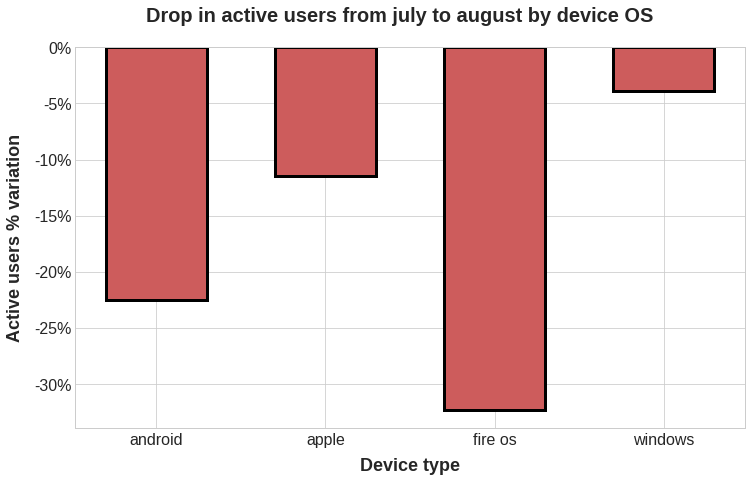

In [288]:
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(12,7))
    fig.suptitle("Drop in active users from july to august by device OS",
                 fontsize=20, fontweight=650, y=0.96)
    
    ax.bar(operative_system_2["device_os"], operative_system_2["variation_pct"], color="indianred", width=0.6,
        edgecolor="black", linewidth=3)
    ax.tick_params(axis="x", labelsize=16, pad=5)
    ax.tick_params(axis="y", labelsize=16)
    ax.set_xlabel("Device type", fontsize=18, fontweight=650, labelpad=10)
    ax.set_ylabel("Active users % variation", fontsize=18, fontweight=650, labelpad=10)
    
    ylabels = ['{:,.0f}%'.format(x) for x in ax.get_yticks()]
    ax.set_yticklabels(ylabels)

    plt.show()

## Specific feature flow/broken tracking code

### Usage flow

*It might be the case that some specific feature within the usage flow was broken at some point close to end of july or within august, hence causing a bad user experience and in consequence prompting users to be less engaged on posterior days to that hypothetical malfunctioning.*

In [269]:
query_usage_flow = """
SELECT SUBSTR(((DATE_TRUNC('week', occurred_at::date)))::text, 6, 5) AS week, event_name,
 COUNT(user_id) AS event_count
FROM events
WHERE event_type = 'engagement'AND event_name NOT LIKE '%%result%%' --This last statement is optional. It is just to exclude the various search results
GROUP BY week, event_name
ORDER BY week;
"""

usage_flow = pd.read_sql(query_usage_flow, engine)

In [271]:
usage_flow.head(10)

week           event_name  event_count
0  04-28            home_page         2546
1  04-28         like_message         1657
2  04-28                login          967
3  04-28  search_autocomplete          424
4  04-28           search_run          358
5  04-28         send_message          904
6  04-28           view_inbox         1510
7  05-05            home_page         5113
8  05-05         like_message         3382
9  05-05                login         1999

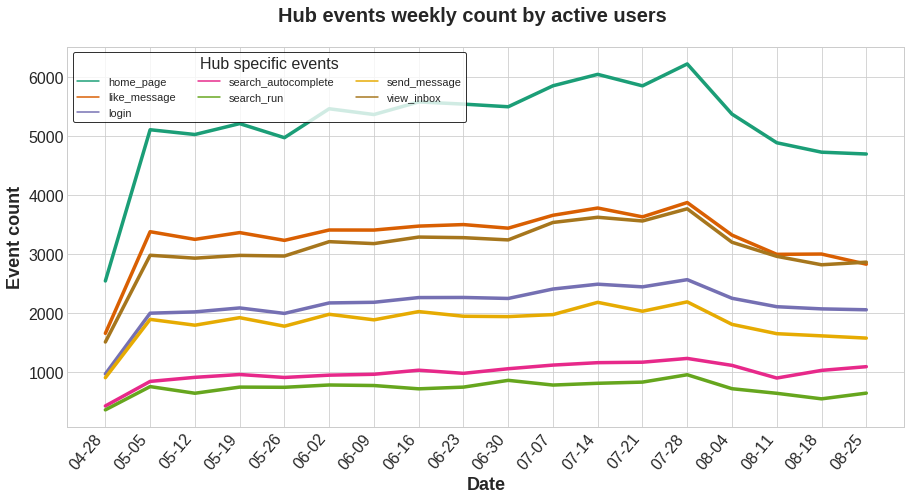

In [289]:
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(15,7))
    fig.suptitle("Hub events weekly count by active users", fontsize=20, fontweight=650, y=0.96)  
    
    ax=sns.lineplot(x="week", y="event_count", data=usage_flow, hue="event_name", palette="Dark2", lw=3.5) 
    ax.tick_params(axis="x", labelsize=16, rotation=50)
    ax.tick_params(axis="y", labelsize=16)
    ax.set_xlabel("Date", fontsize=18, fontweight=650)
    ax.set_ylabel("Event count", fontsize=18, fontweight=650)

    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(loc="upper left", handles=handles[1:], labels=labels[1:], prop={'size': 11}, frameon="yes",
              edgecolor="black", title="Hub specific events", title_fontsize=16, ncol=3)

    plt.show()

*Above query's result shows that there is not any specific feature within the usage flow (not considering the signup steps) that because
of its malfunctioning in t-1 is causing in t a drop in user engagement, since all of the features are moving in sync*

### Signup flow potential issue

#### 1st, it is convenient to check the new users per month

In [64]:
query_signup_flow = """
SELECT DISTINCT state
FROM users;
"""
signup_flow_0 = pd.read_sql(query_signup_flow, engine)

In [65]:
signup_flow_0.head()

state
0  pending
1   active

In [333]:
query_signup_flow = """
SELECT sub2.*, 
 ROUND(CAST(((monthly_new_users::float-lag::float) / lag)*100 as numeric) ,2) AS new_users_variation_pct
FROM(
    SELECT sub1.*,
     LAG(sub1.monthly_new_users, 1) OVER () AS lag
    FROM(
        SELECT LEFT((DATE_TRUNC('month', created_at::date)::text), 7) AS month, 
         COUNT(DISTINCT user_id) AS monthly_new_users
        FROM users
        WHERE state='active'
        GROUP BY month
        )sub1
    )sub2;
"""
signup_flow_1= pd.read_sql(query_signup_flow, engine)

In [334]:
signup_flow_1

month  monthly_new_users    lag  new_users_variation_pct
0   2013-01                160    NaN                      NaN
1   2013-02                160  160.0                     0.00
2   2013-03                150  160.0                    -6.25
3   2013-04                181  150.0                    20.67
4   2013-05                214  181.0                    18.23
5   2013-06                213  214.0                    -0.47
6   2013-07                284  213.0                    33.33
7   2013-08                316  284.0                    11.27
8   2013-09                330  316.0                     4.43
9   2013-10                390  330.0                    18.18
10  2013-11                399  390.0                     2.31
11  2013-12                486  399.0                    21.80
12  2014-01                552  486.0                    13.58
13  2014-02                525  552.0                    -4.89
14  2014-03                615  525.0                    17.14
15  2014-04                726  615.0                    18.05
16  2014-05                779  726.0                     7.30
17  2014-06                873  779.0                    12.07
18  2014-07                997  873.0                    14.20
19  2014-08               1031  997.0                     3.41

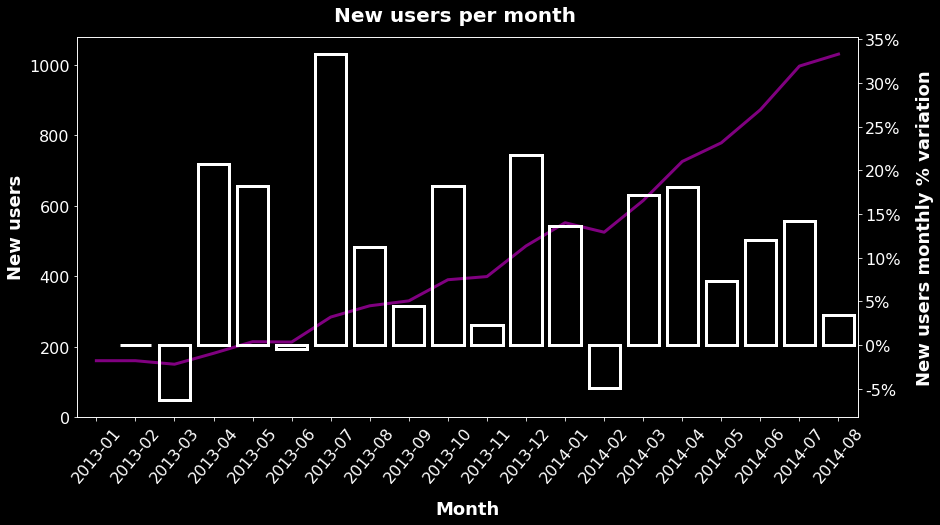

In [606]:
with plt.style.context('dark_background'):
    fig, ax1 = plt.subplots(figsize=(14,7))
    fig.suptitle("New users per month", fontsize=20, fontweight=650, y=0.94) 
    ax2 = ax1.twinx()
    
    sns.lineplot(signup_flow_1["month"], signup_flow_1["monthly_new_users"], lw=3, color="purple", ax=ax1)
    ax1.set_ylim(0, signup_flow_1.monthly_new_users.max()+50)
    ax1.tick_params(axis="x", labelsize=16, rotation=50)
    ax1.tick_params(axis="y", labelsize=16)
    ax1.set_xlabel("Month", fontsize=18, fontweight=650, labelpad=15)
    ax1.set_ylabel("New users", fontsize=18, fontweight=650)
    
    sns.barplot(signup_flow_1["month"], signup_flow_1["new_users_variation_pct"], facecolor=(0, 0, 0, 0),
        edgecolor="white", linewidth=3, ax=ax2)
    ax2.tick_params(axis="x", labelsize=16, pad=10)
    ax2.tick_params(axis="y", labelsize=16)
    ax2.set_xlabel("Device type", fontsize=18, fontweight=650, labelpad=15)
    ax2.set_ylabel("New users monthly % variation", fontsize=18, fontweight=650, labelpad=15)
    
    ylabels = ['{:,.0f}%'.format(x) for x in ax2.get_yticks()]
    ax2.set_yticklabels(ylabels)


#### 2nd, this is the conversion funnel for the 4 months we have info on the log events.

In [336]:
query_signup_flow = """
SELECT DISTINCT event_name
FROM events
WHERE event_type='engagement';
"""
signup_flow_01 = pd.read_sql(query_signup_flow, engine)

In [392]:
query_signup_flow = """
SELECT *
FROM events
WHERE event_type='signup_flow';
"""
signup_flow_02 = pd.read_sql(query_signup_flow, engine)

In [420]:
signup_flow_02.head()

user_id          occurred_at   event_type       event_name location  \
0  12069.0  2014-05-07 20:38:05  signup_flow      create_user   Russia   
1  11768.0  2014-05-01 08:01:36  signup_flow      create_user   France   
2  11768.0  2014-05-01 08:02:06  signup_flow      enter_email   France   
3  11768.0  2014-05-01 08:02:39  signup_flow       enter_info   France   
4  11768.0  2014-05-01 08:03:12  signup_flow  complete_signup   France   

        device  user_type  
0      nexus 5        NaN  
1  macbook pro        NaN  
2  macbook pro        NaN  
3  macbook pro        NaN  
4  macbook pro        3.0

In [5]:
query_signup_flow = """
SELECT sub.*
FROM(
    SELECT LEFT(((DATE_TRUNC('month', users.created_at::date) + INTERVAL '1 day')::text), 7) AS activation_month,
     COUNT(DISTINCT CASE WHEN events.event_name = 'create_user' THEN events.user_id ELSE null END) AS user_created_count,
     COUNT(DISTINCT CASE WHEN events.event_name = 'enter_email' THEN events.user_id ELSE null END) AS enter_email_count,
     COUNT(DISTINCT CASE WHEN events.event_name = 'enter_info' THEN events.user_id ELSE null END) AS enter_info_count,
     COUNT(DISTINCT CASE WHEN events.event_name = 'complete_signup' THEN events.user_id ELSE null END) AS complete_signup_count
    FROM events
    JOIN users
    ON users.user_id = events.user_id
    AND users.created_at >= '2014-05-01 00:00:00'
    GROUP BY activation_month
    )sub
WHERE activation_month > '2014-04-30 23:59:59';
"""

signup_flow_2 = pd.read_sql(query_signup_flow, engine)

In [6]:
signup_flow_2.head()

activation_month  user_created_count  enter_email_count  enter_info_count  \
0          2014-05                1597                955               825   
1          2014-06                1728               1067               925   
2          2014-07                1983               1189              1043   
3          2014-08                1990               1196              1079   

   complete_signup_count  
0                    779  
1                    873  
2                    997  
3                   1031

In [7]:
signup_flow_2.columns

Index(['activation_month', 'user_created_count', 'enter_email_count',
       'enter_info_count', 'complete_signup_count'],
      dtype='object')

In [8]:
fig = go.Figure(go.Funnel(
    y = ['user_created_count', 'enter_email_count', 'enter_info_count', 'complete_signup_count'],
    x = signup_flow_2.loc[0,['user_created_count', 'enter_email_count', 'enter_info_count', 'complete_signup_count']],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["deepskyblue", "lightsalmon", "tan", "teal", "silver"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "blue", "wheat", "wheat"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}})
    )

fig.show()

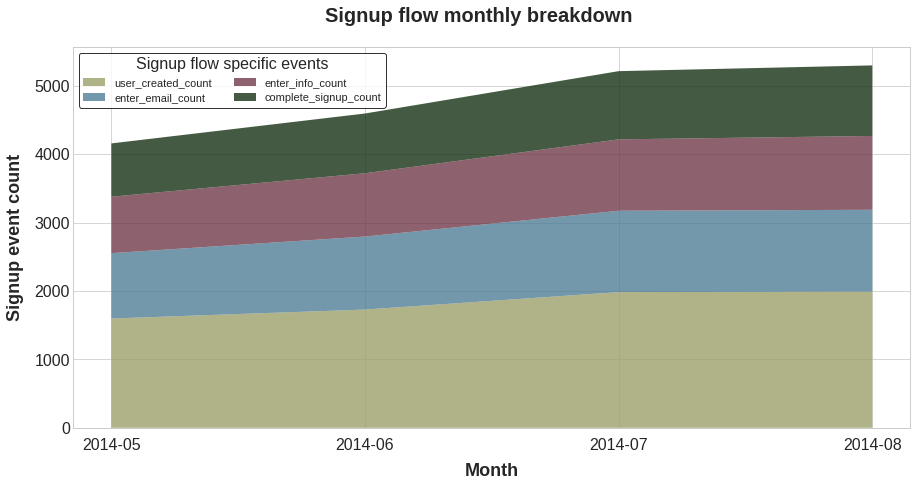

In [499]:
y = [signup_flow_2.user_created_count.tolist(), signup_flow_2.enter_email_count.tolist(),
     signup_flow_2.enter_info_count.tolist(), signup_flow_2.complete_signup_count.tolist()]

pal = sns.cubehelix_palette(4, rot=-2.5, light=0.6)

with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(15,7))
    fig.suptitle("Signup flow monthly breakdown", fontsize=20, fontweight=650, y=0.96)  
    
    plt.stackplot(signup_flow_2["activation_month"], y, labels=signup_flow_2.columns[1:5], lw=3.5,
    colors=pal, alpha=0.8)
    ax.tick_params(axis="x", labelsize=16, pad=10)
    ax.tick_params(axis="y", labelsize=16)
    ax.set_xlabel("Month", fontsize=18, fontweight=650, labelpad=10)
    ax.set_ylabel("Signup event count", fontsize=18, fontweight=650, labelpad=10)

    ax.legend(loc="upper left", prop={'size': 11}, frameon="yes", edgecolor="black",
              title="Signup flow specific events", title_fontsize=16, ncol=2)

    plt.show()

*Check chart and comment. This confirms that signup flow has not been the reason*

### MK campaign/promotions

In [504]:
query_mk = """
SELECT LEFT((DATE_TRUNC('month', occurred_at::date)::text), 7) AS month, action, COUNT(action) AS number_actions
FROM emails
GROUP BY month, action
ORDER BY month, number_actions DESC;
"""
mk_1 = pd.read_sql(query_mk, engine)

In [505]:
mk_1

month                   action  number_actions
0   2014-05       sent_weekly_digest           11730
1   2014-05               email_open            4212
2   2014-05       email_clickthrough            2023
3   2014-05  sent_reengagement_email             758
4   2014-06       sent_weekly_digest           13155
5   2014-06               email_open            4658
6   2014-06       email_clickthrough            2274
7   2014-06  sent_reengagement_email             889
8   2014-07       sent_weekly_digest           15902
9   2014-07               email_open            5611
10  2014-07       email_clickthrough            2721
11  2014-07  sent_reengagement_email             933
12  2014-08       sent_weekly_digest           16480
13  2014-08               email_open            5978
14  2014-08       email_clickthrough            1992
15  2014-08  sent_reengagement_email            1073

Presented in a pivot table format for chart consumption

In [526]:
query_mk = """
SELECT SUBSTR(week::text, 6, 5) AS week_summary,
 ROUND(CAST((email_open::float/total_emails_sent::float) as numeric), 2) AS email_open_rate,
 ROUND(CAST((email_clickthrough::float/email_open::float) as numeric), 2) AS email_clickthrough_rate
FROM(
    SELECT sub.*, (sent_weekly_digest + sent_reengagement_email) AS total_emails_sent
    FROM(
        SELECT DATE_TRUNC('week', occurred_at::date) AS week,
         COUNT(CASE WHEN action = 'sent_weekly_digest' THEN user_id ELSE NULL END) AS sent_weekly_digest,
         COUNT(CASE WHEN action = 'sent_reengagement_email' THEN user_id ELSE NULL END) AS sent_reengagement_email,
         COUNT(CASE WHEN action = 'email_open' THEN user_id ELSE NULL END) AS email_open,
         COUNT(CASE WHEN action = 'email_clickthrough' THEN user_id ELSE NULL END) AS email_clickthrough
        FROM emails
        GROUP BY week
        ) sub
    ) sub2
ORDER BY week_summary;
"""
mk_2 = pd.read_sql(query_mk, engine)

In [527]:
mk_2["email_open_rate"] = mk_2["email_open_rate"].apply(lambda x: x*100)
mk_2["email_clickthrough_rate"] = mk_2["email_clickthrough_rate"].apply(lambda x: x*100)

In [528]:
mk_2.style.format({"email_open_rate":"{:.0f}%", "email_clickthrough_rate":"{:.0f}%"})

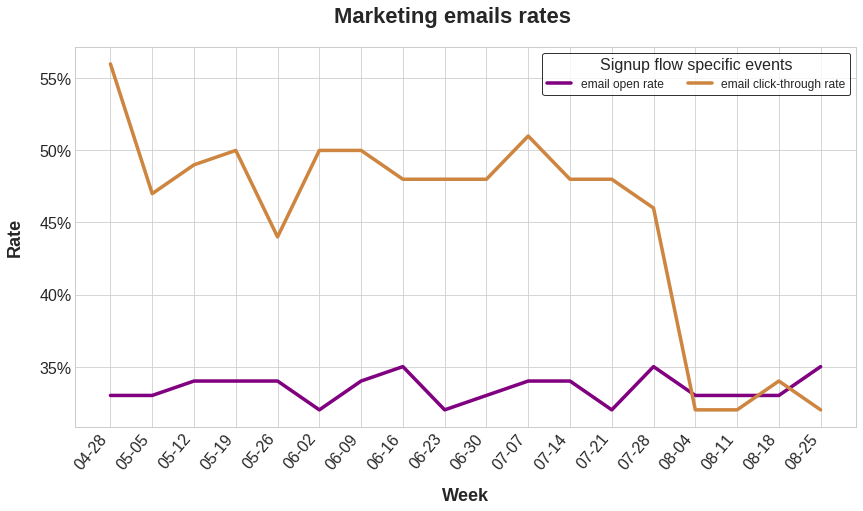

In [560]:
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(14,7))
    fig.suptitle("Marketing emails rates", fontsize=22, fontweight=650, y=0.96)
    
    sns.lineplot(mk_2["week_summary"], mk_2["email_open_rate"], lw=3.5, color="purple")
    sns.lineplot(mk_2["week_summary"], mk_2["email_clickthrough_rate"], lw=3.5, color="peru")
    
    ax.tick_params(axis="x", labelsize=16, rotation=50)
    ax.tick_params(axis="y", labelsize=16)
    ax.set_xlabel("Week", fontsize=18, fontweight=650, labelpad=15)
    ax.set_ylabel("Rate", fontsize=18, fontweight=650, labelpad=15)

    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')
        
    ylabels = ['{:,.0f}%'.format(x) for x in ax.get_yticks()]
    ax.set_yticklabels(ylabels)
    
    ax.legend(loc="upper right", prop={'size': 12}, frameon="yes", edgecolor="black",
              labels=['email open rate','email click-through rate'],
              title="Signup flow specific events", title_fontsize=16, ncol=2)

    plt.show()

### Bad data. QA/bots

*In order to ascertain whether this is the cause, we need to see activity by user and check whether there is unusual activity by few of them. This would cause artificial activity or in other words, a certain kind of spike/unusual rise, which in our case could make sense to have it in july. If this happened to be true, we could say that august drop in user engagement is not such, because it would be rather a problem of fake user engagement in the preceding month.*

First I am going to check whether there is anyone starting engaging with the web but not loging in, this would be pointing to both bots and QA that maybe dont need to sign up (especially bots).

In [9]:
query_bad_data = """
SELECT sub2.*
FROM(
    SELECT sub.*, ROW_NUMBER() OVER (PARTITION BY user_id, day ORDER BY occurred_at::date) AS user_events_per_day
    FROM(
        SELECT *, DATE_TRUNC('day', occurred_at::date) AS day
        FROM events
        WHERE event_type = 'engagement'
        ) sub
    ) sub2
WHERE user_events_per_day = 1 AND event_name != 'login' 
 AND EXTRACT('hour' FROM occurred_at::date)!=0; -- Taking those at 12am that were logged minutes before but in the previous day.
"""
qa_bots = pd.read_sql(query_bad_data, engine)

In [10]:
qa_bots

Empty DataFrame
Columns: [user_id, occurred_at, event_type, event_name, location, device, user_type, day, user_events_per_day]
Index: []

Second, let's see if there are some days with unusual activity (maybe happening in july at the most).

In [116]:
query_bad_data = """
SELECT user_id, sub.day, COUNT(event_name) AS number_events_per_day
FROM(
    SELECT *, DATE_TRUNC('day', occurred_at::date) AS day
    FROM events
    WHERE event_type = 'engagement' 
    ) sub
WHERE day >= '2014-05-01 00:00:00+00:00'
GROUP BY user_id, day
ORDER BY number_events_per_day DESC;
"""
qa_bots_2 = pd.read_sql(query_bad_data, engine)

In [117]:
qa_bots_2["ranking"] = (range(1, len(qa_bots_2)+1))

In [118]:
qa_bots_2.head()

user_id                       day  number_events_per_day  ranking
0   3390.0 2014-07-28 22:00:00+00:00                     71        1
1  10766.0 2014-06-26 22:00:00+00:00                     69        2
2    719.0 2014-08-14 22:00:00+00:00                     69        3
3  14958.0 2014-07-24 22:00:00+00:00                     68        4
4   9466.0 2014-07-01 22:00:00+00:00                     66        5

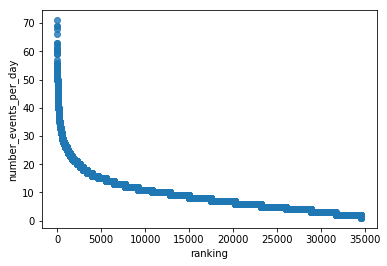

In [119]:
sns.regplot(x=qa_bots_2["ranking"], y=qa_bots_2["number_events_per_day"], fit_reg=False)
plt.show()


In [120]:
qa_bots_2.describe()

user_id  number_events_per_day       ranking
count  34561.000000           34561.000000  34561.000000
mean   10188.478603               9.221406  17281.000000
std     5284.179904               6.744570   9977.045663
min        4.000000               1.000000      1.000000
25%     5652.000000               5.000000   8641.000000
50%    11261.000000               8.000000  17281.000000
75%    14502.000000              12.000000  25921.000000
max    19063.000000              71.000000  34561.000000

Let's identify outliers (be them real or not, does not matter at this point, just let's find what are considered as outliers

In [121]:
stats = qa_bots_2.number_events_per_day.describe().to_frame().transpose()
stats["IQR"] = stats["75%"] - stats["25%"]
stats

count      mean      std  min  25%  50%   75%   max  \
number_events_per_day  34561.0  9.221406  6.74457  1.0  5.0  8.0  12.0  71.0   

                       IQR  
number_events_per_day  7.0

In [122]:
outliers_qa_bots = pd.DataFrame(columns=qa_bots_2.columns)

iqr = stats.at["number_events_per_day","IQR"]
cutoff = iqr * 3
upper = stats.at["number_events_per_day","75%"] + cutoff
results = qa_bots_2[(qa_bots_2["number_events_per_day"] > upper)].copy()
outliers_qa_bots = outliers_qa_bots.append(results)

In [123]:
outliers_qa_bots["month"] = outliers_qa_bots["day"].apply(lambda x: x.strftime("%Y-%m"))

In [124]:
outliers_qa_bots.head()

user_id                        day number_events_per_day ranking    month
0   3390.0  2014-07-28 22:00:00+00:00                    71       1  2014-07
1  10766.0  2014-06-26 22:00:00+00:00                    69       2  2014-06
2    719.0  2014-08-14 22:00:00+00:00                    69       3  2014-08
3  14958.0  2014-07-24 22:00:00+00:00                    68       4  2014-07
4   9466.0  2014-07-01 22:00:00+00:00                    66       5  2014-07

In [125]:
outliers_qa_bots_group = outliers_qa_bots.groupby("month")["number_events_per_day"].sum().reset_index()

In [126]:
outliers_qa_bots_group

month  number_events_per_day
0  2014-05                   3716
1  2014-06                   4106
2  2014-07                   4016
3  2014-08                   2396

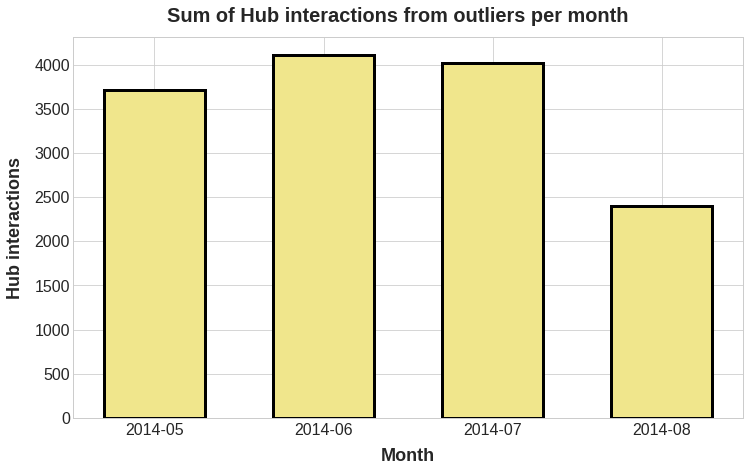

In [135]:
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(12,7))
    fig.suptitle("Sum of Hub interactions from outliers per month", fontsize=20, fontweight=650, y=0.94)
    
    ax.bar(outliers_qa_bots_group["month"], outliers_qa_bots_group["number_events_per_day"], 
           color="khaki", width=0.6, edgecolor="black", linewidth=3)
    ax.tick_params(axis="x", labelsize=16, pad=5)
    ax.tick_params(axis="y", labelsize=16)
    ax.set_xlabel("Month", fontsize=18, fontweight=650, labelpad=10)
    ax.set_ylabel("Hub interactions", fontsize=18, fontweight=650, labelpad=10)

    plt.show()

COMMENT!! This would be a step between the second and the third

In [186]:
query_bad_data = """
SELECT LEFT(sub2.day::text, 10) AS day, SUM(sub2.number_events_per_day_per_head) as number_events_per_day
FROM(
    SELECT user_id, sub.day, COUNT(event_name) AS number_events_per_day_per_head
    FROM(
        SELECT *, DATE_TRUNC('day', occurred_at::date) AS day
        FROM events
        WHERE event_type = 'engagement'
        ) sub
    GROUP BY user_id, day
    ORDER BY number_events_per_day_per_head DESC
     ) sub2  
GROUP BY day
ORDER BY day;
"""
qa_bots_2_3 = pd.read_sql(query_bad_data, engine)

In [187]:
qa_bots_2_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 2 columns):
day                      123 non-null object
number_events_per_day    123 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


In [188]:
qa_bots_2_3.head()

day  number_events_per_day
0  2014-05-01                 2874.0
1  2014-05-02                 3854.0
2  2014-05-03                 1291.0
3  2014-05-04                  690.0
4  2014-05-05                 2583.0

In [162]:
import datetime
import matplotlib.dates as mdates
import numpy as np

In [189]:
qa_bots_2_3["week"] = qa_bots_2_3["day"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").date())

In [190]:
qa_bots_2_3.head()

day  number_events_per_day        week
0  2014-05-01                 2874.0  2014-05-01
1  2014-05-02                 3854.0  2014-05-02
2  2014-05-03                 1291.0  2014-05-03
3  2014-05-04                  690.0  2014-05-04
4  2014-05-05                 2583.0  2014-05-05

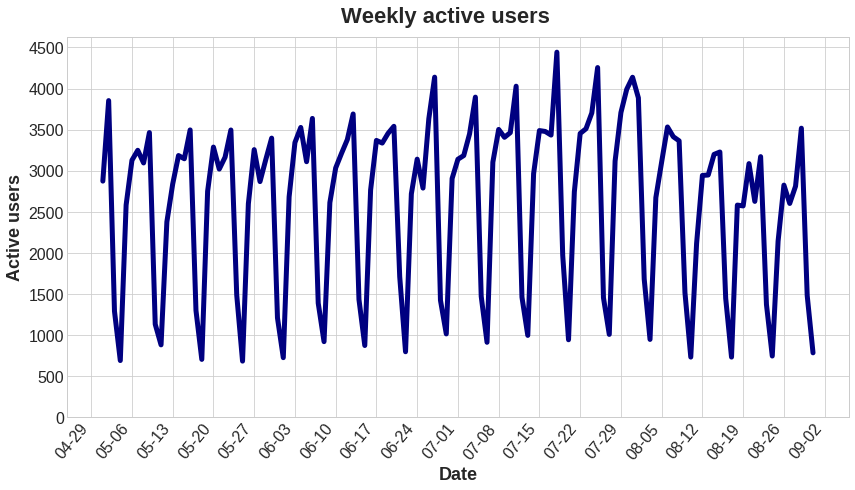

In [191]:
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(14,7))
    fig.suptitle("Weekly active users", fontsize=22, fontweight=650, y=0.94)
    
    sns.lineplot(qa_bots_2_3["week"], qa_bots_2_3["number_events_per_day"], lw=5, color="navy")
    ax.set_ylim(0,)
    ax.tick_params(axis="x", labelsize=16, rotation=50)
    ax.tick_params(axis="y", labelsize=16)
    plt.yticks(np.arange(0, 5000, step=500))
    
    ax.set_xlabel("Date", fontsize=18, fontweight=650)
    ax.set_ylabel("Active users", fontsize=18, fontweight=650)
    
    #set ticks every week
    ax.xaxis.set_major_locator(mdates.WeekdayLocator())
    #set major ticks format
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))

    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')

    plt.show()

## User cohorts

Per month

In [279]:
query_cohort_engagement = """
SELECT sub2.user_cohort, AVG(sub2.user_engagement_actions) as avg_user_engagement_actions
FROM(
    SELECT sub.user_id, sub.user_cohort, sub.month, COUNT(sub.user_id)/4 AS user_engagement_actions
    FROM(
        SELECT events.user_id,
         DATE_TRUNC('month', events.occurred_at::date) + INTERVAL '1 day' AS month, events.event_name,
         CASE WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '1 month' THEN '1 month old'
              WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '2 month' THEN '2 months old'
              WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '3 month' THEN '3 months old'
              WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '4 month' THEN '4 months old'
              WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '5 month' THEN '5 months old'
              WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '6 month' THEN '6 months old'
              WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '7 month' THEN '7 months old'
              WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '8 month' THEN '8 months old'
              WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '9 month' THEN '9 months old'
              WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '10 month' THEN '10 months old'
              WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '11 month' THEN '11 months old'
              WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '12 month' THEN '12 months old'
              ELSE '+12 months old' END AS user_cohort
        FROM events
        RIGHT JOIN users
        ON users.user_id = events.user_id
        AND users.state = 'active'
        AND events.event_type = 'engagement'
        ) sub
    WHERE event_name = 'login' AND sub.user_id IN (15112, 13385)
    GROUP BY sub.month, sub.user_id, sub.user_cohort
    ) sub2
GROUP BY sub2.user_cohort
ORDER BY avg_user_engagement_actions DESC;
"""
cohorts_all = pd.read_sql(query_cohort_engagement, engine)

In [280]:
cohorts_all

user_cohort  avg_user_engagement_actions
0   1 month old                          7.5
1  2 months old                          4.0

All months together

In [266]:
query_cohort_engagement = """
SELECT sub2.month, sub2.user_cohort, AVG(sub2.user_engagement_actions) as avg_user_engagement_actions
FROM(
    SELECT sub.user_id, sub.user_cohort, sub.month, COUNT(sub.user_id)/4 AS user_engagement_actions
    FROM(
        SELECT events.user_id,
         DATE_TRUNC('month', events.occurred_at::date) + INTERVAL '1 day' AS month, events.event_name,
         CASE WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '1 month' THEN '1 month old'
              WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '2 month' THEN '2 months old'
              WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '3 month' THEN '3 months old'
              WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '4 month' THEN '4 months old'
              WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '5 month' THEN '5 months old'
              WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '6 month' THEN '6 months old'
              WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '7 month' THEN '7 months old'
              WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '8 month' THEN '8 months old'
              WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '9 month' THEN '9 months old'
              WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '10 month' THEN '10 months old'
              WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '11 month' THEN '11 months old'
              WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '12 month' THEN '12 months old'
              ELSE '+12 months old' END AS user_cohort
        FROM events
        RIGHT JOIN users
        ON users.user_id = events.user_id
        AND users.state = 'active'
        AND events.event_type = 'engagement'
        ) sub
    WHERE event_name = 'login'
    GROUP BY sub.month, sub.user_id, sub.user_cohort
    ) sub2
GROUP BY sub2.user_cohort, sub2.month
ORDER BY sub2.user_cohort, sub2.month;
"""
cohorts_month = pd.read_sql(query_cohort_engagement, engine)

In [267]:
cohorts_month

month     user_cohort  avg_user_engagement_actions
0  2014-05-01 22:00:00+00:00   10 months old                     4.034091
1  2014-06-01 22:00:00+00:00   10 months old                     3.087912
2  2014-07-01 22:00:00+00:00   10 months old                     3.037037
3  2014-08-01 22:00:00+00:00   10 months old                     3.056180
4  2014-05-01 22:00:00+00:00   11 months old                     2.965909
5  2014-06-01 22:00:00+00:00   11 months old                     3.008772
6  2014-07-01 22:00:00+00:00   11 months old                     3.053571
7  2014-08-01 22:00:00+00:00   11 months old                     2.926829
8  2014-05-01 22:00:00+00:00  +12 months old                     4.576190
9  2014-06-01 22:00:00+00:00  +12 months old                     3.834586
10 2014-07-01 22:00:00+00:00  +12 months old                     4.293605
11 2014-08-01 22:00:00+00:00  +12 months old                     3.918644
12 2014-05-01 22:00:00+00:00   12 months old                     3.363636
13 2014-06-01 22:00:00+00:00   12 months old                     3.064516
14 2014-07-01 22:00:00+00:00   12 months old                     2.988764
15 2014-08-01 22:00:00+00:00   12 months old                     2.769231
16 2014-05-01 22:00:00+00:00     1 month old                     3.119349
17 2014-06-01 22:00:00+00:00     1 month old                     3.080658
18 2014-07-01 22:00:00+00:00     1 month old                     3.090645
19 2014-08-01 22:00:00+00:00     1 month old                     2.810980
20 2014-05-01 22:00:00+00:00    2 months old                     2.962069
21 2014-06-01 22:00:00+00:00    2 months old                     2.604839
22 2014-07-01 22:00:00+00:00    2 months old                     2.804094
23 2014-08-01 22:00:00+00:00    2 months old                     2.522436
24 2014-05-01 22:00:00+00:00    3 months old                     2.795000
25 2014-06-01 22:00:00+00:00    3 months old                     2.809756
26 2014-07-01 22:00:00+00:00    3 months old                     2.821256
27 2014-08-01 22:00:00+00:00    3 months old                     2.648148
28 2014-05-01 22:00:00+00:00    4 months old                     2.759563
29 2014-06-01 22:00:00+00:00    4 months old                     2.736264
30 2014-07-01 22:00:00+00:00    4 months old                     2.825726
31 2014-08-01 22:00:00+00:00    4 months old                     2.425926
32 2014-05-01 22:00:00+00:00    5 months old                     3.166667
33 2014-06-01 22:00:00+00:00    5 months old                     3.121387
34 2014-07-01 22:00:00+00:00    5 months old                     2.805970
35 2014-08-01 22:00:00+00:00    5 months old                     3.024691
36 2014-05-01 22:00:00+00:00    6 months old                     2.850394
37 2014-06-01 22:00:00+00:00    6 months old                     2.881481
38 2014-07-01 22:00:00+00:00    6 months old                     2.674419
39 2014-08-01 22:00:00+00:00    6 months old                     2.723077
40 2014-05-01 22:00:00+00:00    7 months old                     3.092437
41 2014-06-01 22:00:00+00:00    7 months old                     2.879433
42 2014-07-01 22:00:00+00:00    7 months old                     2.589404
43 2014-08-01 22:00:00+00:00    7 months old                     2.940741
44 2014-05-01 22:00:00+00:00    8 months old                     2.768519
45 2014-06-01 22:00:00+00:00    8 months old                     3.132231
46 2014-07-01 22:00:00+00:00    8 months old                     2.866197
47 2014-08-01 22:00:00+00:00    8 months old                     2.883495
48 2014-05-01 22:00:00+00:00    9 months old                     3.026549
49 2014-06-01 22:00:00+00:00    9 months old                     2.972477
50 2014-07-01 22:00:00+00:00    9 months old                     2.796296
51 2014-08-01 22:00:00+00:00    9 months old                     2.468354

In [277]:
query_cohort_engagement = """
SELECT sub.user_id AS user, sub.user_cohort, sub.month, COUNT(sub.user_id)/4 AS user_engagement_actions
FROM(
    SELECT events.user_id,
     DATE_TRUNC('month', events.occurred_at::date) + INTERVAL '1 day' AS month, events.event_name,
     CASE WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '1 month' THEN '1 month old'
          WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '2 month' THEN '2 months old'
          WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '3 month' THEN '3 months old'
          WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '4 month' THEN '4 months old'
          WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '5 month' THEN '5 months old'
          WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '6 month' THEN '6 months old'
          WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '7 month' THEN '7 months old'
          WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '8 month' THEN '8 months old'
          WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '9 month' THEN '9 months old'
          WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '10 month' THEN '10 months old'
          WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '11 month' THEN '11 months old'
          WHEN events.occurred_at::timestamp - users.created_at::timestamp <= INTERVAL '12 month' THEN '12 months old'
          ELSE '+12 months old' END AS user_cohort
    FROM events
    RIGHT JOIN users
    ON users.user_id = events.user_id
    AND users.state = 'active'
    AND events.event_type = 'engagement'
    ) sub
WHERE event_name = 'login' AND sub.user_id IN (15112, 13385)
GROUP BY sub.user_id, sub.month, sub.user_cohort
"""
cohorts_month = pd.read_sql(query_cohort_engagement, engine)

In [278]:
cohorts_month

user   user_cohort                     month  user_engagement_actions
0  13385.0   1 month old 2014-06-01 22:00:00+00:00                        4
1  15112.0   1 month old 2014-07-01 22:00:00+00:00                       11
2  15112.0  2 months old 2014-08-01 22:00:00+00:00                        4

In [230]:
query_test="""
SELECT COUNT (*)
FROM events;
"""
test = pd.read_sql(query_test, engine)


In [231]:
test

count
0  340832

In [53]:
query_cohorts="""
SELECT
 LEFT((DATE_TRUNC('week',sub.occurred_at::date)::text), 10) as cohort,
 AVG(sub.age_at_event) as "Average age during week",
 --COUNT(DISTINCT CASE WHEN sub.user_age > 126 THEN sub.user_id ELSE NULL END) AS "18+ weeks",
 --COUNT(DISTINCT CASE WHEN sub.user_age < 133 AND sub.user_age >= 126 THEN sub.user_id ELSE NULL END) AS "18 weeks",
 --COUNT(DISTINCT CASE WHEN sub.user_age < 126 AND sub.user_age >= 119 THEN sub.user_id ELSE NULL END) AS "17 weeks",
 --COUNT(DISTINCT CASE WHEN sub.user_age < 119 AND sub.user_age >= 112 THEN sub.user_id ELSE NULL END) AS "16 weeks",
 --COUNT(DISTINCT CASE WHEN sub.user_age < 112 AND sub.user_age >= 105 THEN sub.user_id ELSE NULL END) AS "15 weeks",
 --COUNT(DISTINCT CASE WHEN sub.user_age < 105 AND sub.user_age >= 98 THEN sub.user_id ELSE NULL END) AS "14 weeks", 
 --COUNT(DISTINCT CASE WHEN sub.user_age < 98 AND sub.user_age >= 91 THEN sub.user_id ELSE NULL END) AS "13 weeks",
 COUNT(DISTINCT CASE WHEN sub.user_age > 91 THEN sub.user_id ELSE NULL END) AS "12+ weeks", 
 COUNT(DISTINCT CASE WHEN sub.user_age < 91 AND sub.user_age >= 84 THEN sub.user_id ELSE NULL END) AS "12 weeks",
 COUNT(DISTINCT CASE WHEN sub.user_age < 84 AND sub.user_age >= 77 THEN sub.user_id ELSE NULL END) AS "11 weeks",
 COUNT(DISTINCT CASE WHEN sub.user_age < 77 AND sub.user_age >= 70 THEN sub.user_id ELSE NULL END) AS "10 weeks", 
 COUNT(DISTINCT CASE WHEN sub.user_age < 70 AND sub.user_age >= 63 THEN sub.user_id ELSE NULL END) AS "9 weeks", 
 COUNT(DISTINCT CASE WHEN sub.user_age < 63 AND sub.user_age >= 56 THEN sub.user_id ELSE NULL END) AS "8 weeks",
 COUNT(DISTINCT CASE WHEN sub.user_age < 56 AND sub.user_age >= 49 THEN sub.user_id ELSE NULL END) AS "7 weeks", 
 COUNT(DISTINCT CASE WHEN sub.user_age < 49 AND sub.user_age >= 42 THEN sub.user_id ELSE NULL END) AS "6 weeks",
 COUNT(DISTINCT CASE WHEN sub.user_age < 42 AND sub.user_age >= 35 THEN sub.user_id ELSE NULL END) AS "5 weeks", 
 COUNT(DISTINCT CASE WHEN sub.user_age < 35 AND sub.user_age >= 28 THEN sub.user_id ELSE NULL END) AS "4 weeks", 
 COUNT(DISTINCT CASE WHEN sub.user_age < 28 AND sub.user_age >= 21 THEN sub.user_id ELSE NULL END) AS "3 weeks",
 COUNT(DISTINCT CASE WHEN sub.user_age < 21 AND sub.user_age >= 14 THEN sub.user_id ELSE NULL END) AS "2 weeks", 
 COUNT(DISTINCT CASE WHEN sub.user_age < 14 AND sub.user_age >= 7 THEN sub.user_id ELSE NULL END) AS "1 week", 
 COUNT(DISTINCT CASE WHEN sub.user_age < 7 THEN sub.user_id ELSE NULL END) AS "Less than a week"
FROM(
    SELECT events.occurred_at, users.user_id, 
     DATE_TRUNC('week',users.activated_at::date) as activation_week,
     EXTRACT('day' FROM events.occurred_at::timestamp - users.activated_at::date) as age_at_event,
     EXTRACT('day' FROM '2014-09-01'::timestamp - users.activated_at::date) as user_age
    FROM users users
    JOIN events events
    ON events.user_id = users.user_id
    AND events.event_type = 'engagement'
    AND events.event_name = 'login'
    AND events.occurred_at >= '2014-05-01'
    AND events.occurred_at < '2014-09-01'
    WHERE users.activated_at IS NOT NULL
    ) sub
GROUP BY cohort
ORDER BY cohort;
"""

cohorts = pd.read_sql(query_cohorts, engine)

In [44]:
cohorts

cohort  Average age during week  12+ weeks  12 weeks  11 weeks  \
0   2014-04-28               124.445708        701         0         0   
1   2014-05-05               124.843422       1054         0         0   
2   2014-05-12               132.421573       1094         0         0   
3   2014-05-19               132.803640       1147         0         0   
4   2014-05-26               132.830075       1113         0         0   
5   2014-06-02               132.283479        976       164         0   
6   2014-06-09               131.510989        888       152       164   
7   2014-06-16               136.923145        811        88       168   
8   2014-06-23               136.729038        759        69        86   
9   2014-06-30               136.897732        727        51        68   
10  2014-07-07               136.363221        759        40        49   
11  2014-07-14               143.904055        723        28        44   
12  2014-07-21               142.180703        702        22        37   
13  2014-07-28               144.544393        724        20        32   
14  2014-08-04               141.186057        615        15        26   
15  2014-08-11               126.430536        509        14        22   
16  2014-08-18               128.446429        479         8        17   
17  2014-08-25               128.705396        446         5         9   

    10 weeks  9 weeks  8 weeks  7 weeks  6 weeks  5 weeks  4 weeks  3 weeks  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
5          0        0        0        0        0        0        0        0   
6          0        0        0        0        0        0        0        0   
7        181        0        0        0        0        0        0        0   
8        163      167        0        0        0        0        0        0   
9        103      153      164        0        0        0        0        0   
10        67       98      162      174        0        0        0        0   
11        43       66       96      160      180        0        0        0   
12        34       45       72       94      161      191        0        0   
13        28       32       54       80       95      179      191        0   
14        21       26       42       50       53       90      160      163   
15        12       27       34       35       40       66       85      158   
16        14       17       33       22       19       47       60       79   
17        13       17       19       19       24       31       44       51   

    2 weeks  1 week  Less than a week  
0         0       0                 0  
1         0       0                 0  
2         0       0                 0  
3         0       0                 0  
4         0       0                 0  
5         0       0                 0  
6         0       0                 0  
7         0       0                 0  
8         0       0                 0  
9         0       0                 0  
10        0       0                 0  
11        0       0                 0  
12        0       0                 0  
13        0       0                 0  
14        0       0                 0  
15      207       0                 0  
16      192     211                 0  
17      102     197               214

In [32]:
16270+5371

21641

In [45]:
cohorts.loc["Total", "12+ weeks":"Less than a week"] = cohorts.iloc[:,1:].sum()

In [46]:
cohorts

cohort  Average age during week  12+ weeks  12 weeks  11 weeks  \
0      2014-04-28               124.445708      701.0       0.0       0.0   
1      2014-05-05               124.843422     1054.0       0.0       0.0   
2      2014-05-12               132.421573     1094.0       0.0       0.0   
3      2014-05-19               132.803640     1147.0       0.0       0.0   
4      2014-05-26               132.830075     1113.0       0.0       0.0   
5      2014-06-02               132.283479      976.0     164.0       0.0   
6      2014-06-09               131.510989      888.0     152.0     164.0   
7      2014-06-16               136.923145      811.0      88.0     168.0   
8      2014-06-23               136.729038      759.0      69.0      86.0   
9      2014-06-30               136.897732      727.0      51.0      68.0   
10     2014-07-07               136.363221      759.0      40.0      49.0   
11     2014-07-14               143.904055      723.0      28.0      44.0   
12     2014-07-21               142.180703      702.0      22.0      37.0   
13     2014-07-28               144.544393      724.0      20.0      32.0   
14     2014-08-04               141.186057      615.0      15.0      26.0   
15     2014-08-11               126.430536      509.0      14.0      22.0   
16     2014-08-18               128.446429      479.0       8.0      17.0   
17     2014-08-25               128.705396      446.0       5.0       9.0   
Total         NaN                      NaN    14227.0     676.0     722.0   

       10 weeks  9 weeks  8 weeks  7 weeks  6 weeks  5 weeks  4 weeks  \
0           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
5           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
6           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
7         181.0      0.0      0.0      0.0      0.0      0.0      0.0   
8         163.0    167.0      0.0      0.0      0.0      0.0      0.0   
9         103.0    153.0    164.0      0.0      0.0      0.0      0.0   
10         67.0     98.0    162.0    174.0      0.0      0.0      0.0   
11         43.0     66.0     96.0    160.0    180.0      0.0      0.0   
12         34.0     45.0     72.0     94.0    161.0    191.0      0.0   
13         28.0     32.0     54.0     80.0     95.0    179.0    191.0   
14         21.0     26.0     42.0     50.0     53.0     90.0    160.0   
15         12.0     27.0     34.0     35.0     40.0     66.0     85.0   
16         14.0     17.0     33.0     22.0     19.0     47.0     60.0   
17         13.0     17.0     19.0     19.0     24.0     31.0     44.0   
Total     679.0    648.0    676.0    634.0    572.0    604.0    540.0   

       3 weeks  2 weeks  1 week  Less than a week  
0          0.0      0.0     0.0               0.0  
1          0.0      0.0     0.0               0.0  
2          0.0      0.0     0.0               0.0  
3          0.0      0.0     0.0               0.0  
4          0.0      0.0     0.0               0.0  
5          0.0      0.0     0.0               0.0  
6          0.0      0.0     0.0               0.0  
7          0.0      0.0     0.0               0.0  
8          0.0      0.0     0.0               0.0  
9          0.0      0.0     0.0               0.0  
10         0.0      0.0     0.0               0.0  
11         0.0      0.0     0.0               0.0  
12         0.0      0.0     0.0               0.0  
13         0.0      0.0     0.0               0.0  
14       163.0      0.0     0.0               0.0  
15       158.0    207.0     0.0               0.0  
16        79.0    192.0   211.0               0.0  
17        51.0    102.0   197.0             214.0  
Total    451.0    501

In [50]:
cohorts.ix[:, "Total"] = cohorts.loc[:,"12+ weeks":"Less than a week"].sum()

/home/salva/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [51]:
cohorts

cohort  Average age during week  12+ weeks  12 weeks  11 weeks  \
0      2014-04-28               124.445708      701.0       0.0       0.0   
1      2014-05-05               124.843422     1054.0       0.0       0.0   
2      2014-05-12               132.421573     1094.0       0.0       0.0   
3      2014-05-19               132.803640     1147.0       0.0       0.0   
4      2014-05-26               132.830075     1113.0       0.0       0.0   
5      2014-06-02               132.283479      976.0     164.0       0.0   
6      2014-06-09               131.510989      888.0     152.0     164.0   
7      2014-06-16               136.923145      811.0      88.0     168.0   
8      2014-06-23               136.729038      759.0      69.0      86.0   
9      2014-06-30               136.897732      727.0      51.0      68.0   
10     2014-07-07               136.363221      759.0      40.0      49.0   
11     2014-07-14               143.904055      723.0      28.0      44.0   
12     2014-07-21               142.180703      702.0      22.0      37.0   
13     2014-07-28               144.544393      724.0      20.0      32.0   
14     2014-08-04               141.186057      615.0      15.0      26.0   
15     2014-08-11               126.430536      509.0      14.0      22.0   
16     2014-08-18               128.446429      479.0       8.0      17.0   
17     2014-08-25               128.705396      446.0       5.0       9.0   
Total         NaN                      NaN    14227.0     676.0     722.0   

       10 weeks  9 weeks  8 weeks  7 weeks  6 weeks  5 weeks  4 weeks  \
0           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
5           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
6           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
7         181.0      0.0      0.0      0.0      0.0      0.0      0.0   
8         163.0    167.0      0.0      0.0      0.0      0.0      0.0   
9         103.0    153.0    164.0      0.0      0.0      0.0      0.0   
10         67.0     98.0    162.0    174.0      0.0      0.0      0.0   
11         43.0     66.0     96.0    160.0    180.0      0.0      0.0   
12         34.0     45.0     72.0     94.0    161.0    191.0      0.0   
13         28.0     32.0     54.0     80.0     95.0    179.0    191.0   
14         21.0     26.0     42.0     50.0     53.0     90.0    160.0   
15         12.0     27.0     34.0     35.0     40.0     66.0     85.0   
16         14.0     17.0     33.0     22.0     19.0     47.0     60.0   
17         13.0     17.0     19.0     19.0     24.0     31.0     44.0   
Total     679.0    648.0    676.0    634.0    572.0    604.0    540.0   

       3 weeks  2 weeks  1 week  Less than a week  Total  
0          0.0      0.0     0.0               0.0    NaN  
1          0.0      0.0     0.0               0.0    NaN  
2          0.0      0.0     0.0               0.0    NaN  
3          0.0      0.0     0.0               0.0    NaN  
4          0.0      0.0     0.0               0.0    NaN  
5          0.0      0.0     0.0               0.0    NaN  
6          0.0      0.0     0.0               0.0    NaN  
7          0.0      0.0     0.0               0.0    NaN  
8          0.0      0.0     0.0               0.0    NaN  
9          0.0      0.0     0.0               0.0    NaN  
10         0.0      0.0     0.0               0.0    NaN  
11         0.0      0.0     0.0               0.0    NaN  
12         0.0      0.0     0.0               0.0    NaN  
13         0.0      0.0     0.0               0.0    NaN  
14       163.0      0.0     0.0               0.0    NaN  
15       158.0    207.0     0.0               0.0    NaN  
16    